In [1]:
import pylab as plt
import sys
sys.path.append("../")
from scan.load_all import *

{'700 lines of documentation': True, 'tests': True, 'examples': True, 'CI': True, '4 community contributors': True, 'bus factor >= 3': True}


In [2]:
repos = repolist

In [3]:
repos.columns

Index(['PID', 'url'], dtype='object')

In [4]:
def summary():
    keys=['/github', '/gitlab', '/xgitlab', '/bitbucket']
    ans = []
    for P in repos['PID'].unique():
        ans.append([len(repos.loc[(repos['PID'] == P) & repos['url'].str.contains(k)]) for k in keys])
    return ans

In [5]:
s0 = summary()

In [6]:
v = [(sum(x), x) for x in s0]
v.sort()
s = [x[1] for x in reversed(v)]

In [8]:
np.array(s).sum(0), np.array(s).sum()

(array([263,  13,  10,  18]), 304)

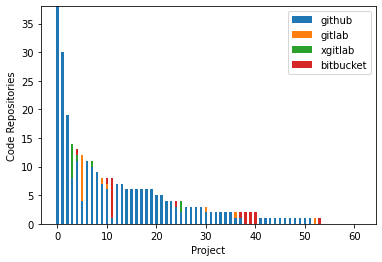

In [8]:
width = 0.5
y = np.array(s).cumsum(axis=1).transpose()
p1 = plt.bar(np.arange(len(s)), y[0], width)
p2 = plt.bar(np.arange(len(s)), y[1]-y[0], width, bottom=y[0])
p3 = plt.bar(np.arange(len(s)), y[2]-y[1], width, bottom=y[1])
p4 = plt.bar(np.arange(len(s)), y[3]-y[2], width, bottom=y[2])

plt.xlabel('Project')
plt.ylabel('Code Repositories')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('github', 'gitlab', 'xgitlab', 'bitbucket'))

plt.show()

In [9]:
y

array([[38, 30, 19,  8, 11,  4, 11, 10,  9,  7,  6,  1,  7,  7,  6,  6,
         6,  6,  6,  6,  5,  5,  4,  4,  3,  2,  3,  3,  3,  3,  2,  2,
         2,  2,  2,  2,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 30, 19,  8, 11, 12, 11, 10,  9,  8,  7,  1,  7,  7,  6,  6,
         6,  6,  6,  6,  5,  5,  4,  4,  3,  2,  3,  3,  3,  3,  3,  2,
         2,  2,  2,  2,  2,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 30, 19, 14, 12, 12, 11, 11,  9,  8,  7,  1,  7,  7,  6,  6,
         6,  6,  6,  6,  5,  5,  4,  4,  3,  4,  3,  3,  3,  3,  3,  2,
         2,  2,  2,  2,  2,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 30, 19, 14, 13, 12, 11, 11,  9,  8,  8,  8,  7,  7,  6,  6,
         6,  6,  6,  6,  5,  5,  4,  4,  4,  4,  3,  3,  3,  3,  3,  2,
         2,  

In [11]:
u = repos['PID'].unique()
v = [(sum(x), u[i]) for i,x in enumerate(s0)]
v.sort()
v[-4::-4]

[(14, 62),
 (11, 37),
 (8, 6),
 (6, 50),
 (6, 2),
 (4, 36),
 (3, 60),
 (2, 65),
 (2, 49),
 (2, 38),
 (1, 54),
 (1, 34),
 (1, 20),
 (0, 43),
 (0, 19)]